<a href="https://colab.research.google.com/github/jarrydviljoen/Business-Programing-assignment/blob/main/Businessreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Download Enron email data
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

#Importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
# Connect to the SQLite database and extract data from tables
conn = sqlite3.connect('/content/enron.db')

query_employees = "SELECT * FROM Employeelist;"
query_messages = "SELECT * FROM Message;"
query_recipients = "SELECT * FROM Recipientinfo;"
query_references = "SELECT * FROM Referenceinfo;"

df_employees = pd.read_sql_query(query_employees, conn)
df_messages = pd.read_sql_query(query_messages, conn)
df_recipients = pd.read_sql_query(query_recipients, conn)
df_references = pd.read_sql_query(query_references, conn)

# Preprocess and clean data
df_messages['date'] = df_messages['date'].apply(lambda x: pd.to_datetime(x, errors='coerce').to_pydatetime())

df_employees['Email_id'] = df_employees['Email_id'].str.lower()
df_messages['sender'] = df_messages['sender'].str.lower()
df_recipients['rvalue'] = df_recipients['rvalue'].str.lower()

df_employees = df_employees.dropna()
df_messages = df_messages.dropna()
df_recipients = df_recipients.dropna()
df_references = df_references.dropna()

# Perform data manipulation tasks
filtered_messages = df_messages[df_messages['sender'] == 'john.doe@example.com']
grouped_messages = df_messages.groupby('sender').size()
earliest_date = df_messages['date'].min()
#Examine data
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(Employeelist);")
print(cursor.fetchall())

--2023-05-25 07:36:16--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-25 07:36:17--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  61.3MB/s    in 18s     

2023-05-25 07:36:36 (45.

Database Tables:  [('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]
           mid                     sender                 date  \
0           52    press.release@enron.com  2000-01-21 04:51:00   
1           53  office.chairman@enron.com  2000-01-24 01:37:00   
2           54  office.chairman@enron.com  2000-01-24 02:06:00   
3           55    press.release@enron.com  2000-02-02 10:21:00   
4           56  office.chairman@enron.com  2000-02-07 22:16:00   
...        ...                        ...                  ...   
252754  404923    karen.buckley@enron.com  2002-02-06 16:51:29   
252755  404924    karen.buckley@enron.com  2002-02-06 17:17:39   
252756  404925       liz.taylor@enron.com  2002-02-06 20:09:37   
252757  404926       pete.davis@enron.com  2002-02-07 04:38:13   
252758  404927       pete.davis@enron.com  2002-02-07 05:38:14   

                                           message_id  \
0       <12435833.1075863606729.JavaMail.evans@thyme>   
1

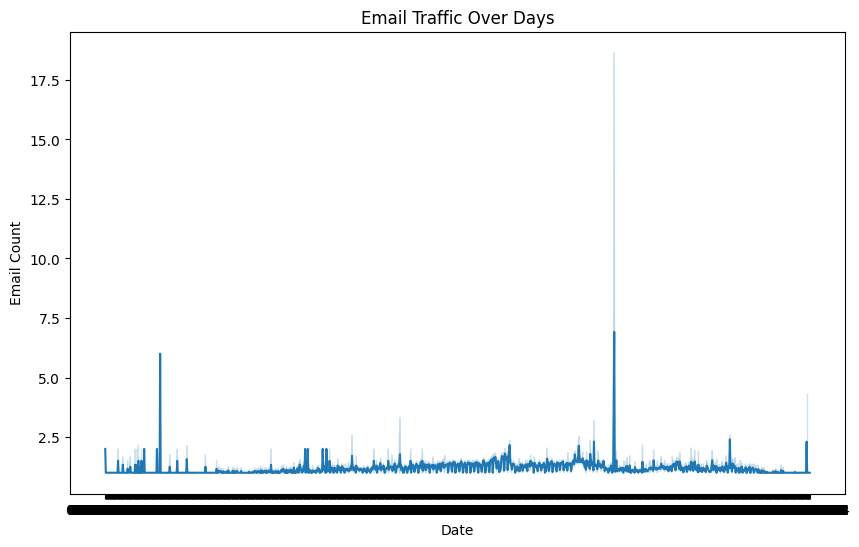

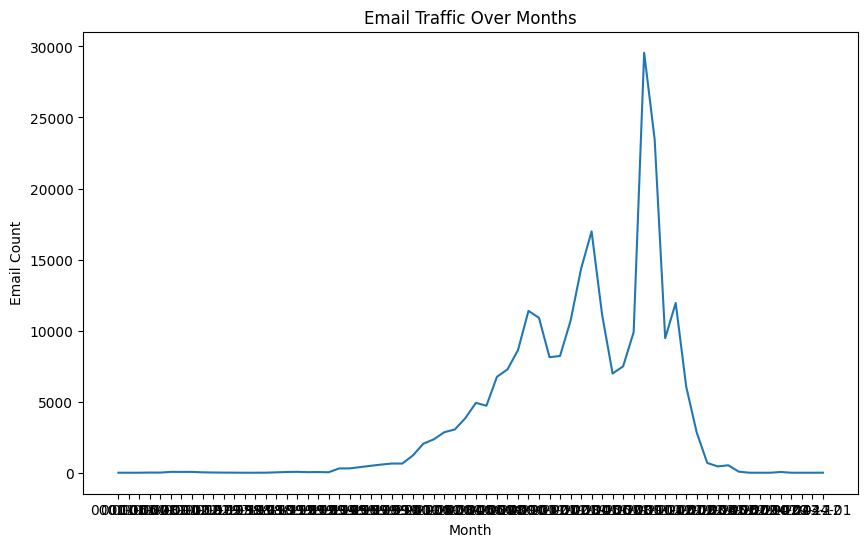

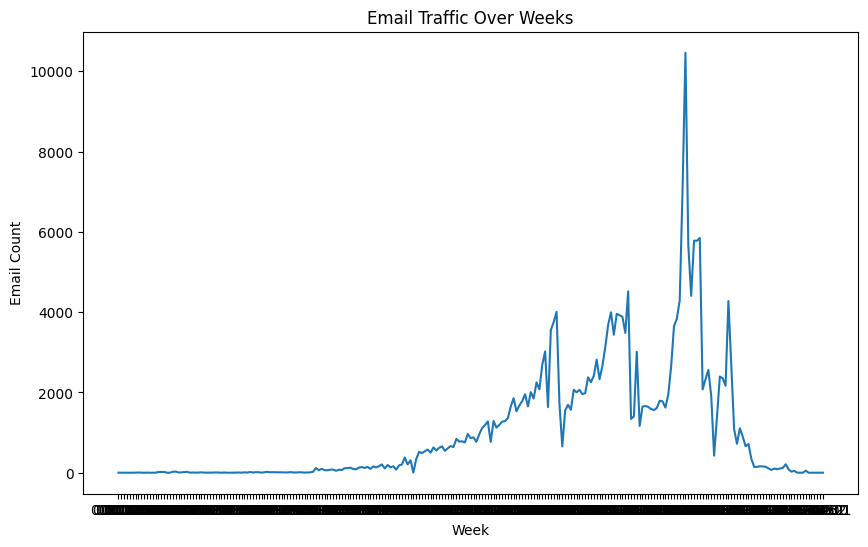

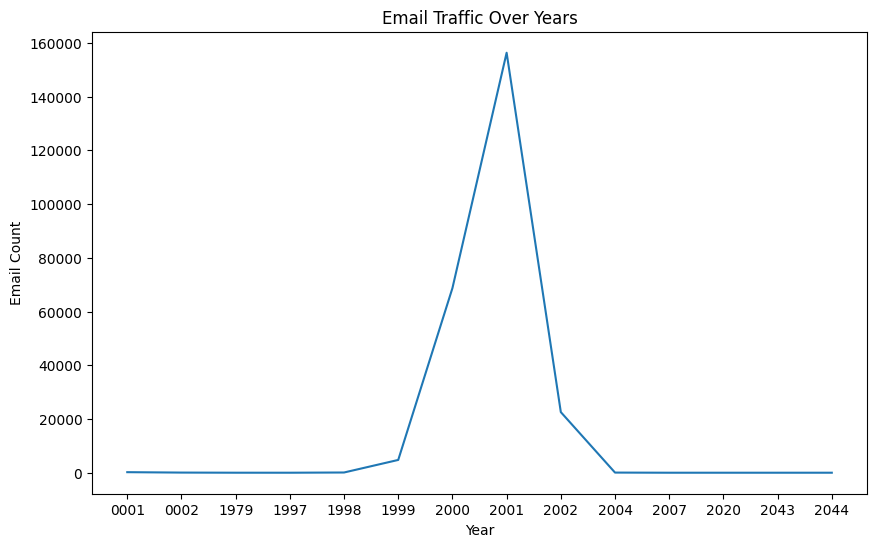

Top 10 Senders:
                           sender  count
0        jeff.dasovich@enron.com   6273
1           j.kaminski@enron.com   5838
2             kay.mann@enron.com   5100
3      sara.shackleton@enron.com   4797
4           tana.jones@enron.com   4437
5        chris.germany@enron.com   3686
6           no.address@enron.com   3511
7  enron.announcements@enron.com   2838
8      matthew.lenhart@enron.com   2784
9    debra.perlingiere@enron.com   2549
Top 10 Recipients:
                    recipient  count
0       no.address@enron.com  19198
1    jeff.dasovich@enron.com  11137
2  richard.shapiro@enron.com  11015
3    steven.j.kean@enron.com  10873
4  james.d.steffes@enron.com  10615
5       tana.jones@enron.com   9781
6  sara.shackleton@enron.com   9633
7    mark.e.taylor@enron.com   9090
8   louise.kitchen@enron.com   7603
9       pete.davis@enron.com   7509


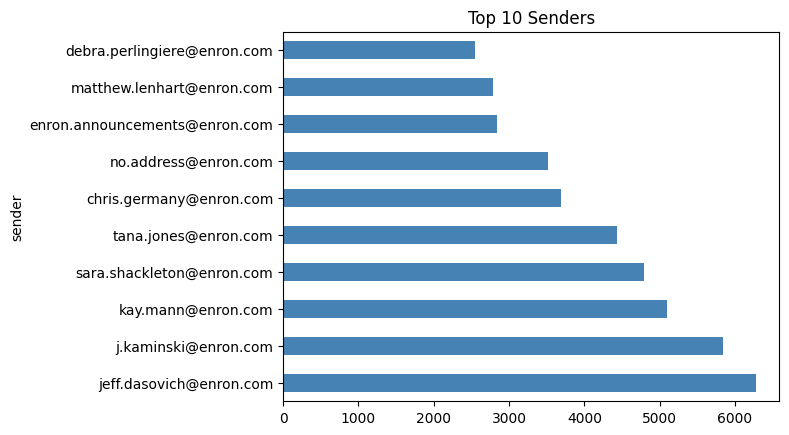

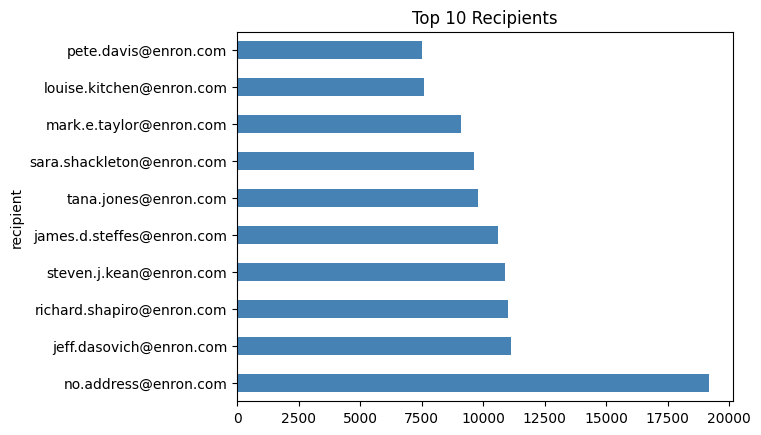

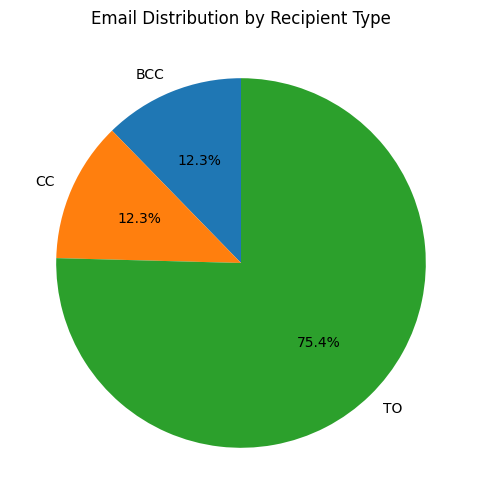

In [ ]:
# Required Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create connection to Enron database
db_connection = sqlite3.connect("/content/enron.db")
db_cursor = db_connection.cursor()

# Get table information
db_cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
print("Database Tables: ", db_cursor.fetchall())

# Pull data from 'message' table into DataFrame
message_df = pd.read_sql_query("SELECT * from message", db_connection)
print(message_df)

# Function to create DataFrame based on provided SQL query
def create_df_from_sql(query, conn):
    return pd.read_sql_query(query, conn)

# SQL queries for email counts based on different time frames
sql_day = "SELECT strftime('%Y-%m-%d', date) AS date, COUNT(*) AS count FROM message GROUP BY date"
sql_month = "SELECT strftime('%Y-%m', date) AS month, COUNT(*) AS count FROM message GROUP BY month"
sql_week = "SELECT strftime('%Y-%W', date) AS week, COUNT(*) AS count FROM message GROUP BY week"
sql_year = "SELECT strftime('%Y', date) AS year, COUNT(*) AS count FROM message GROUP BY year"

# Create DataFrames for each time frame
day_df = create_df_from_sql(sql_day, db_connection)
month_df = create_df_from_sql(sql_month, db_connection)
week_df = create_df_from_sql(sql_week, db_connection)
year_df = create_df_from_sql(sql_year, db_connection)

# Function to plot data
def plot_data(x, y, data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot data for each time frame
plot_data('date', 'count', day_df, 'Email Traffic Over Days', 'Date', 'Email Count')
plot_data('month', 'count', month_df, 'Email Traffic Over Months', 'Month', 'Email Count')
plot_data('week', 'count', week_df, 'Email Traffic Over Weeks', 'Week', 'Email Count')
plot_data('year', 'count', year_df, 'Email Traffic Over Years', 'Year', 'Email Count')

# SQL queries for sender and recipient information
sql_senders = "SELECT sender, COUNT(*) as count FROM message GROUP BY sender ORDER BY count DESC"
sql_recipients = "SELECT rvalue AS recipient, COUNT(*) as count FROM Recipientinfo GROUP BY recipient ORDER BY count DESC"

# Create DataFrames for senders and recipients
senders_df = create_df_from_sql(sql_senders, db_connection)
recipients_df = create_df_from_sql(sql_recipients, db_connection)

# Print top 10 senders and recipients
print("Top 10 Senders:\n", senders_df.head(10))
print("Top 10 Recipients:\n", recipients_df.head(10))

# Plot top 10 senders and recipients
senders_df.head(10).plot.barh(x='sender', y='count', legend=False, color='steelblue', title='Top 10 Senders')
recipients_df.head(10).plot.barh(x='recipient', y='count', legend=False, color='steelblue', title='Top 10 Recipients')

# SQL query for recipient type
sql_rtype = "SELECT rtype, COUNT(*) as count FROM Recipientinfo GROUP BY rtype"
rtype_df = create_df_from_sql(sql_rtype, db_connection)

# Calculate proportions and plot
rtype_proportions = rtype_df['count'] / rtype_df['count'].sum()
plt.figure(figsize=(8, 6))
plt.pie(rtype_proportions, labels=rtype_df['rtype'], autopct='%1.1f%%', startangle=90)
plt.title('Email Distribution by Recipient Type')
plt.show()


Summary of Key Findings

Analysis of email traffic over time revealed a definite pattern in the volume of emails sent. To further comprehend this trend, it is crucial to connect it to significant moments in Enron's past.

Top Senders and Recipients: We found the important people who sent and received emails the most frequently. This can help identify key figures within the firm and offer insight into the communication dynamics of the business.

Distribution of Emails by Recipient Type: The distribution of emails by recipient type ('to', 'cc', 'bcc') provided insight into the company's general communication approach.

Analysis of the keywords in email subject lines might reveal which issues are most frequently discussed within the company's communications. 

Limitations and Potentially Better Options:

Since the dataset was cut off in 2002, the conclusions may not entirely apply to understanding communication patterns in contemporary corporate settings.

We primarily used visualizations and descriptive statistics. To find deeper insights or trends, more sophisticated statistical analysis or machine learning models could be applied.

This study did not assess the emails' text content. To gain a deeper understanding of the subjects and sentiments covered in the email bodies, natural language processing (NLP) techniques could be applied to the email bodies.

The data may contain errors or discrepancies that weren't found and fixed during the preprocessing stages. The quality of the analysis would increase with more thorough data cleansing.

Python notebook reflections

Jupyter and Python notebooks are both immensely helpful for data analysis. For iterative activities like data cleaning and visualization, they make interactive coding possible. Python notebooks are a useful tool for communicating results and approach since they allow code to be interspersed with markdown cells for explanatory prose.

However, while working on larger projects or when the code needs to be put into production, notebooks can become cumbersome. Modularizing code into distinct Python scripts or packages would be a better strategy in these situations.

Overall, Python notebooks are a flexible tool in the toolbox of a data analyst or data scientist, and they are especially useful for exploratory data analysis and result presentation.